In [700]:
import multiprocessing
import random
import time
from threading import current_thread

import rx
from rx.scheduler import ThreadPoolScheduler
from rx import operators as ops
from rx import create
import cbpro
from pymongo import MongoClient
import numpy as np
import dateutil.parser

import pandas as pd

In [701]:
mongo_client = MongoClient('mongodb://localhost:27017/')
db = mongo_client.cryptocurrency_database
BTC_collection = db.BTC_collection2
ACC_collection = db.ACC_collection 

In [702]:
docs = ACC_collection.find()
npvals = np.sort([[fd['price'], fd['size']] for fd in docs if float(fd["size"]) > 10 ])
x = np.sort(npvals[:, 1])
y = npvals[:, 0]

KeyError: 'size'

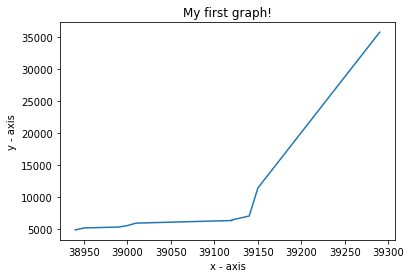

In [703]:
# importing the required module
import matplotlib.pyplot as plt
  
# # x axis values
# x = [1,2,3]
# # corresponding y axis values
# y = [2,4,1]
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('My first graph!')
  
# function to show the plot
plt.show()

In [39]:
docs = ACC_collection.find()

In [40]:
docs.next()

{'_id': ObjectId('60ba97c4e3d2c41b9db40178'),
 'price': 34466.85,
 'size': 0.0030150900000000002}

In [55]:
ACC_collection_buy = db.ACC_collection_buy 
ACC_collection_sell = db.ACC_collection_sell

In [87]:
docsell = ACC_collection_sell.find()
npvalsell = np.sort([[fd['price'], fd['size']] for fd in docsell if float(fd["size"]) ])
x = np.sort(npvalsell[:, 1])
y = npvalsell[:, 0]

In [133]:
import ISODate

ModuleNotFoundError: No module named 'ISODate'

In [173]:
docsell = ACC_collection_sell.find( { 'datetime' : {'$lte': dateutil.parser.isoparse('2014-08-24T07:52:04.945306Z'), '$gte': dateutil.parser.isoparse('2014-09-24T07:51:04.958496Z')}})

In [174]:
dateutil.parser.isoparse('2014-09-24T07:52:04.945306Z')

datetime.datetime(2014, 9, 24, 7, 52, 4, 945306, tzinfo=tzutc())

In [175]:
docsell.next()

StopIteration: 

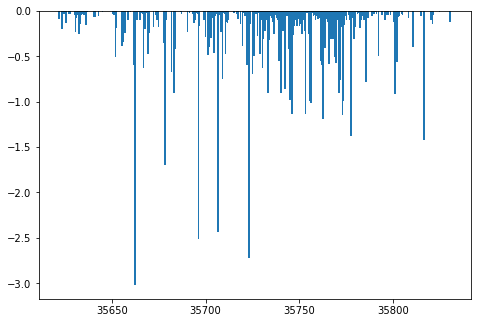

In [88]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()

In [76]:
b = BTC_collection.find()

In [80]:
b.next()

{'_id': ObjectId('60b4555328938b1920a0a92d'),
 'type': 'ticker',
 'sequence': 25784465767,
 'product_id': 'BTC-USD',
 'price': '34461.31',
 'open_24h': '34789.78',
 'volume_24h': '14701.10322518',
 'low_24h': '34287.18',
 'high_24h': '36500',
 'volume_30d': '894738.53316694',
 'best_bid': '34461.30',
 'best_ask': '34461.31',
 'side': 'buy',
 'time': '2021-05-31T03:13:43.010030Z',
 'trade_id': 181491840,
 'last_size': '0.00277843'}

In [81]:
docsell = ACC_collection_sell.find()
docsell.next()

{'_id': ObjectId('60bbe5e36f6c9d0948a95698'),
 'price': 35830.6,
 'size': -0.09495963999999998}

In [91]:
time = '2021-05-31T03:13:43.010030Z'

In [92]:
from datetime import *

time = datetime.strptime("03/02/21 16:30", "%d/%m/%y %H:%M")
print("Time = {:d}:{:02d}".format(time.hour, time.minute))

Time = 16:30


In [93]:
datetime.fromisoformat(time)

TypeError: fromisoformat: argument must be str

In [97]:
import dateutil.parser
dateutil.parser.isoparse('2008-09-03T20:56:35.450686Z')

datetime.datetime(2008, 9, 3, 20, 56, 35, 450686, tzinfo=tzutc())

In [102]:
time = '2021-05-31T03:13:43.010030Z'

In [110]:

dt = dateutil.parser.isoparse(time)

In [111]:
dt

datetime.datetime(2021, 5, 31, 3, 13, 43, 10030, tzinfo=tzutc())

In [112]:
print("Time = {:d}:{:02d}".format(dt.hour, dt.minute))

Time = 3:13


In [113]:
dt.isoformat()

'2021-05-31T03:13:43.010030+00:00'

In [114]:
dt = dt.replace(second=0, microsecond=0) 

In [115]:
dt.isoformat()

'2021-05-31T03:13:00+00:00'

In [118]:
td = db.TD

In [123]:
td.delete_many({})

In [128]:

td.find_one_and_update({ "price" : 3, "datetime" : dt },
{"$inc": 
    {"size": 2}
},upsert=True)

{'_id': ObjectId('60bbef586f6c9d0948aa2798'),
 'datetime': datetime.datetime(2021, 5, 31, 3, 13),
 'price': 3,
 'size': 3}

In [129]:

td.find().next()

{'_id': ObjectId('60bbef586f6c9d0948aa2798'),
 'datetime': datetime.datetime(2021, 5, 31, 3, 13),
 'price': 3,
 'size': 5}

In [182]:
docsell = ACC_collection_sell.find()

In [185]:
allsell = [r for r in docsell]

In [186]:
len(allsell)

5779

In [187]:
allsell[-1]

{'_id': ObjectId('60bbf3eb6f6c9d0948aa8119'),
 'datetime': datetime.datetime(2021, 6, 5, 22, 0, 19, 162000),
 'price': 34992.88,
 'size': -0.05}

In [241]:
import datetime

In [245]:
# data = [r for r in allsell[:] if r['buy_size'] > 0 and r['sell_size'] < 0]

In [247]:
# data

In [248]:
#ACC_collection.delete_many({})

In [249]:
import pandas as pd

In [19]:
def aggregateByFreq(frequency, df):
    aggdf = df.groupby(pd.Grouper(freq=frequency))[["volume"]].sum()
    aggmdf = df.groupby(pd.Grouper(freq=frequency))[["vmap"]].mean()
    aggdf["price"] = (aggdf["volume"] * aggmdf["vmap"]) / aggdf["volume"]
    return aggdf

In [76]:
# dsell = ACC_collection_sell.find({"datetime": {"$gt": datetime.datetime(2020, 12, 1)}})
acc = ACC_collection.find({"datetime": {"$lt": dateutil.parser.isoparse('2021-06-06T00:00:00.450686Z')}})


In [125]:
acc = ACC_collection.find({"datetime": {"$lt": dateutil.parser.isoparse('2021-06-06T22:19:35.450686Z')
                                       ,"$gt": dateutil.parser.isoparse('2021-06-05T22:17:00.450686Z')}})

In [4]:
acc = ACC_collection.find({"datetime": {"$lt": dateutil.parser.isoparse('2021-06-08T22:19:35.450686Z')
                                       ,"$gt": dateutil.parser.isoparse('2021-06-06T03:00:00.450686Z')}})

allsell = [r for r in acc]
data = [r for r in allsell[:]]

df = pd.DataFrame.from_records(data, columns=["datetime", "price", "buy_size", "sell_size"])

### let's do the volume first by minute

bsdf = df.groupby(pd.Grouper(key='datetime',freq='Min'))[["buy_size", "sell_size"]].sum()

mpdf = df.groupby(pd.Grouper(key='datetime',freq='Min'))[["price"]].mean()


vmap_volume = bsdf["buy_size"] + np.abs(bsdf["sell_size"])

vol = pd.DataFrame(vmap_volume, columns=["vmap_volume"])

vmap = ((bsdf["buy_size"] + np.abs(bsdf["sell_size"])) * mpdf["price"]) / (bsdf["buy_size"] + np.abs(bsdf["sell_size"]))

In [39]:
df2 = df.set_index('datetime')

In [ ]:
df.groupby(["Group", "Size"])

In [40]:
df2

,price,buy_size,sell_size
datetime,,,
2021-06-06 15:49:00,36111.86,0.001366,0.000000
2021-06-06 15:49:00,36112.77,0.002640,0.000000
2021-06-06 15:49:00,36107.52,0.000000,-0.039520
2021-06-06 15:49:00,36107.13,0.000000,-0.050754
2021-06-06 15:50:00,36109.72,0.004378,0.000000
...,...,...,...
2021-06-08 11:40:00,32951.79,0.000000,-0.018619
2021-06-08 11:40:00,32951.23,0.000000,-0.009960
2021-06-08 11:40:00,32950.70,0.000000,-0.034079


In [51]:
ss = df2.loc['2021-06-06 15:50:00':'2021-06-06 15:50:00'].sort_values('price', ascending=False)[:50]

In [267]:
tmp_collection = db.TMP

<bound method Database.get_collection of Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'cryptocurrency_database')>

In [78]:
ss["price"][:5]

datetime
2021-06-06 15:50:00    36115.48
2021-06-06 15:50:00    36114.75
2021-06-06 15:50:00    36114.74
2021-06-06 15:50:00    36114.34
2021-06-06 15:50:00    36114.32
Name: price, dtype: float64

In [81]:
36114.74 - 36114.34

0.4000000000014552

In [71]:
start.values[0]

36115.48

In [ ]:
crea

In [96]:
diffs = np.empty([0])

In [100]:
np.append(diffs, 1)

array([1.])

In [99]:
np.insert(diffs, 1)

TypeError: _insert_dispatcher() missing 1 required positional argument: 'values'

In [112]:
diffs = []
start = ss["price"][:1].values[0]
for v1 in [v for v in ss["price"][1:]]:
    diffs.append(abs(v1-start))
    start = v1
    
ndiffs = np.array(diffs)    

In [113]:
diffs[:5]

[0.7300000000032014,
 0.010000000002037268,
 0.4000000000014552,
 0.01999999999679858,
 0.20999999999912689]

In [15]:
# vmap = (vol["vmap_volume"] * mpdf["price"]) / vol["vmap_volume"]

In [16]:
bsdf["volume"] = vol
bsdf["vmap"] = vmap

<AxesSubplot:xlabel='datetime'>

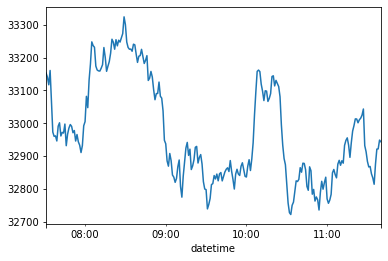

In [17]:
delta = bsdf["buy_size"] + bsdf["sell_size"]
bsdf["delta"] = delta
bsdf["vmap"][-250:].plot.line()

# deltabar.loc['2021-06-07 04:45:00':'2021-06-08 09:05:00'].plot.bar()

In [20]:
ndf = aggregateByFreq('5Min', bsdf)
ndf

,volume,price
datetime,,
2021-06-06 15:45:00,0.094280,36109.820000
2021-06-06 15:50:00,12.664272,36125.442896
2021-06-06 15:55:00,43.120294,36180.076725
2021-06-06 16:00:00,31.672957,36220.882616
2021-06-06 16:05:00,17.982698,36254.655585
...,...,...
2021-06-08 11:20:00,62.169669,33006.268340
2021-06-08 11:25:00,53.707351,32985.812807
2021-06-08 11:30:00,52.794414,32859.482034


<AxesSubplot:xlabel='datetime'>

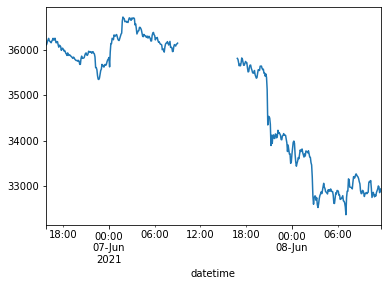

In [21]:
ndf["price"].plot.line()

<AxesSubplot:xlabel='datetime'>

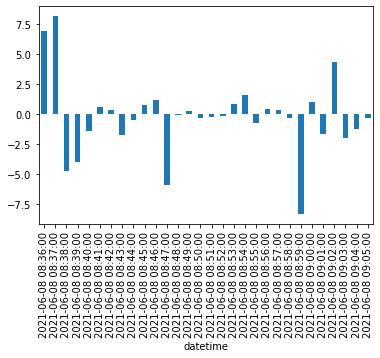

In [22]:
deltabar = bsdf.groupby(pd.Grouper(freq='Min'))["delta"].sum()
# deltabar[-25:].plot.bar()

deltabar.loc['2021-06-07 05:30:00':'2021-06-08 09:05:00'][-30:].plot.bar()

In [23]:
bsdf

,buy_size,sell_size,volume,vmap,delta
datetime,,,,,
2021-06-06 15:49:00,0.004006,-0.090274,0.094280,36109.820000,-0.086268
2021-06-06 15:50:00,1.679846,-1.174185,2.854031,36104.556933,0.505661
2021-06-06 15:51:00,0.414902,-0.484109,0.899012,36128.086842,-0.069207
2021-06-06 15:52:00,2.770523,-0.037961,2.808484,36111.808333,2.732562
2021-06-06 15:53:00,1.799422,-0.483620,2.283042,36137.207077,1.315802
...,...,...,...,...,...
2021-06-08 11:36:00,3.409286,-3.264690,6.673976,32875.571774,0.144596
2021-06-08 11:37:00,6.257361,-1.859532,8.116893,32921.084020,4.397829
2021-06-08 11:38:00,3.197374,-2.274677,5.472051,32921.854386,0.922697


In [279]:
36140 - 35474

666

In [274]:
36140 - 35820

320

In [456]:
sjs

array([[  34810.        ,  -42082.23445143],
       [  34900.        ,  -19700.43439271],
       [  34910.        ,  -10120.46875708],
       [  34930.        ,   -8567.44777817],
       [  34960.        ,   -5523.55092954],
       [  34980.        ,   -5163.35741825],
       [  34980.        ,   -4494.64240215],
       [  35020.        ,   -3754.48048093],
       [  35190.        ,   -3378.02662033],
       [  35440.        ,    3673.79347401],
       [  35520.        ,    3703.51533434],
       [  35540.        ,    4217.7734796 ],
       [  35610.        ,    5087.94469751],
       [  35750.        ,    6479.57142857],
       [  35790.        ,    7085.43652133],
       [  35790.        ,   11117.78007707],
       [  35830.        ,   11383.60120929],
       [  35840.        ,   12338.67836852],
       [  35880.        ,   12969.48598631],
       [  35910.        ,   13160.14852662],
       [  35970.        ,   14865.74065055],
       [  36020.        ,   22437.72425   ],
       [  

In [235]:
2 * (36126 - 35471)

1310

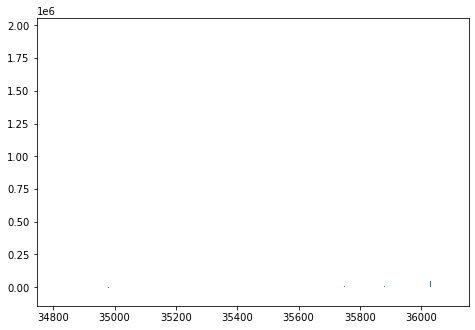

In [455]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()

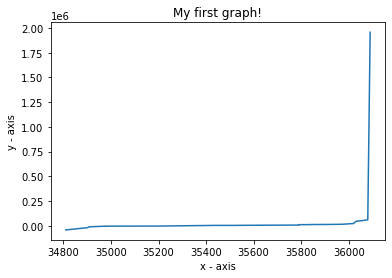

In [454]:
# importing the required module
import matplotlib.pyplot as plt
  
# # x axis values
# x = [1,2,3]
# # corresponding y axis values
# y = [2,4,1]
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('My first graph!')
  
# function to show the plot
plt.show()

In [120]:
for i in range(60):
    if(i % 10 == 0):
        print(i)

0
10
20
30
40
50


In [117]:
60 % 12

0

In [143]:
acc = BTC_collection.find({"time": {"$lt": dateutil.parser.isoparse('2021-06-13T16:00:35.450686Z')
                                       ,"$gt": dateutil.parser.isoparse('2021-06-01T16:00:00.450686Z')}})


In [229]:
docs = BTC_collection.find({
        "$or" : [
            {"type": "ticker"}, {"time" : { "$gt" : dateutil.parser.isoparse('2021-06-12T16:00:00.450686Z')}}
        ]
    })


In [243]:
docs = BTC_collection.find({
            "datetime" : { "$gt" : dateutil.parser.isoparse('2021-06-12T16:00:00.450686Z')  }  
})

In [231]:
docs = BTC_collection.find({
            "type": "ticker", "datetime" : '2021-05-31T03:13:44.025604Z'
    }
)

In [704]:
docs = BTC_collection.find({
            "time" : {"$gt" : dateutil.parser.isoparse('2021-05-31T03:13:44.025604Z')}
    }
)

In [705]:
docs.next()

StopIteration: 

In [706]:
docs = ACC_collection.find({
            "datetime" : {"$gt" : dateutil.parser.isoparse('2021-06-12T15:00:44.025604Z')}
    }
)

In [707]:
docs.next()

{'_id': ObjectId('60c4e36417be568b38c82f93'),
 'datetime': datetime.datetime(2021, 6, 12, 16, 40),
 'price': 35466.6,
 'buy_size': 0.00684344,
 'sell_size': 0}

In [763]:
acc = BTC_collection.find({
            "datetime" : { "$gt" : dateutil.parser.isoparse('2021-06-14T13:00:00.450686Z')  }  
})
data = [r for r in acc]
df = pd.DataFrame.from_records(data, columns=["datetime", "price", "size", "side"])
#df.set_index(['datetime'], inplace=True)

df

tdate = dateutil.parser.isoparse('2021-06-12T16:25:32.450686Z')

def transform(row):
    def secondize(x, freq):
        if (x % freq) == 0:
            return(x)
        else:
            return(int(x/freq) * freq)

    d = row["datetime"]
    dt = d.replace(second=secondize(d.second, 15), microsecond=0)
    row["datetime"] = dt
    row["price"] = int(row["price"] / 10) * 10
    return row
#     insert(row, dt, price, size)    



df2 = df.apply(lambda row: transform(row), axis = 1)

df3 = pd.DataFrame(df2.groupby(["datetime", "price", "side"])["size"].sum())

df4 = df3.sort_values(by = ['datetime','price'], ascending=[True, False])

df2.shape

sdf = df2[df2["side"] == "sell"].sort_values(by = ['datetime','price'], ascending=[True, False])
bdf = df2[df2["side"] == "buy"].sort_values(by = ['datetime','price'], ascending=[True, False])

bdfa = bdf[(bdf['datetime'] >= '2021-06-12 18:00:20') & (bdf['datetime'] <= '2021-06-14 18:30')]
bdf3 = pd.DataFrame(bdfa.groupby(["datetime", "price"])["size"].sum())
bdf3.rename(columns={"size": "buy"}, inplace=True)

sdfa = sdf[(sdf['datetime'] >= '2021-06-12 18:00:20') & (sdf['datetime'] <= '2021-06-14 18:30')]
sdf3 = pd.DataFrame(sdfa.groupby(["datetime", "price"])["size"].sum())
sdf3.rename(columns={"size": "sell"}, inplace=True)

mdf = pd.merge(sdf3, bdf3, on=["datetime", "price"], how="outer").fillna(0).sort_values(by = ['datetime','price'], ascending=[True, False])

mdf["delta"] = mdf["buy"] + (mdf["sell"] * -1)




bnp = np.delete(np.insert(np.array(mdf["buy"]), 0, [-1]), -1)
snp = np.append(np.array(mdf["sell"])[:-1], [-1])

mdf["b"] = bnp
mdf["s"] = snp

mdf["mask"] = [1 if v else 0 for v in (mdf["b"] != -1) & (mdf["s"] != -1)]

poc = (np.abs((mdf["s"] - mdf["b"])) / (mdf["s"] + (mdf["b"]) )) * ((mdf["s"] + mdf["b"]) - np.abs((mdf["s"] - mdf["b"]))) * mdf["mask"]

poc.sort_values(ascending=False)

mdf["poc"] = poc







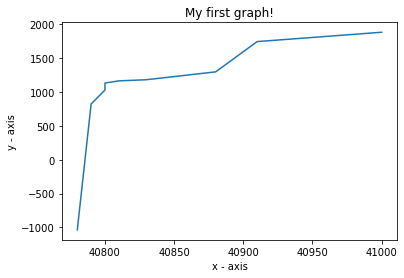

,datetime,price,sell,buy,delta,b,s,mask,poc,c,c+
1077,2021-06-14 15:31:15,40610,0.397112,0.533606,0.136495,0.004982,0.397112,1,0.009718,-80.702080,80.702080
1078,2021-06-14 15:31:15,40600,3.405877,0.057079,-3.348798,0.533606,3.405877,1,0.778103,-7.382753,7.382753
1071,2021-06-14 15:31:00,40630,0.352143,1.361262,1.009119,1.417309,0.352143,1,0.423963,5.024808,5.024808
1072,2021-06-14 15:31:00,40620,2.049548,0.480787,-1.568761,1.361262,2.049548,1,0.549393,-2.505624,2.505624
1073,2021-06-14 15:31:00,40610,0.556295,0.121150,-0.435145,0.480787,0.556295,1,0.070011,-2.157051,2.157051
...,...,...,...,...,...,...,...,...,...,...,...
2,2021-06-14 14:19:15,40930,12.018971,1.178167,-10.840804,0.023814,12.018971,1,0.047439,-505.709318,505.709318
3,2021-06-14 14:19:15,40920,2.103167,4.106761,2.003594,1.178167,2.103167,1,0.664245,-2.785118,2.785118
4,2021-06-14 14:19:15,40910,1.555744,0.049368,-1.506376,4.106761,1.555744,1,1.401758,3.639741,3.639741
0,2021-06-14 14:19:00,40930,0.235804,2.175091,1.939287,-1.000000,0.235804,0,0.000000,-0.000000,0.000000


In [764]:
def calc(v):
    smaller = v[1] if v[1] < v[2] else (v[2] * -1)
    if smaller == 0:
        return 0
    return ((v[1] + v[2]) / smaller) * v[3]

mdf["c"]=[calc(v) for v in np.array(mdf.reset_index()[["price", "s", "b", "mask", "datetime"]])]
mdf["c+"]=[np.abs(calc(v)) for v in np.array(mdf.reset_index()[["price", "s", "b", "mask", "datetime"]])]

js = np.array([(v[0], v[1]) for v in np.array(mdf.reset_index()[["price","c", "c+"]].sort_values(["c+","price"], ascending=[False, False])[:25])])

sjs = np.sort(js, axis=0)[-10:]

sjs

x = sjs[:,0]
y = sjs[:,1]

# importing the required module
import matplotlib.pyplot as plt
  

  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('My first graph!')
  
# function to show the plot
plt.show()

(((mdf["s"]) + (mdf["b"])) / ((mdf["s"] * -1) + (mdf["b"]))) * mdf["mask"]

((mdf["s"][:5]) + (mdf["b"][:5])) / ((mdf["s"][:5] * -1) + (mdf["b"][:5]))


plotmdf = mdf.reset_index().sort_values(['datetime','price'], ascending=[False, False])
plotmdf[150:]

<AxesSubplot:xlabel='datetime'>

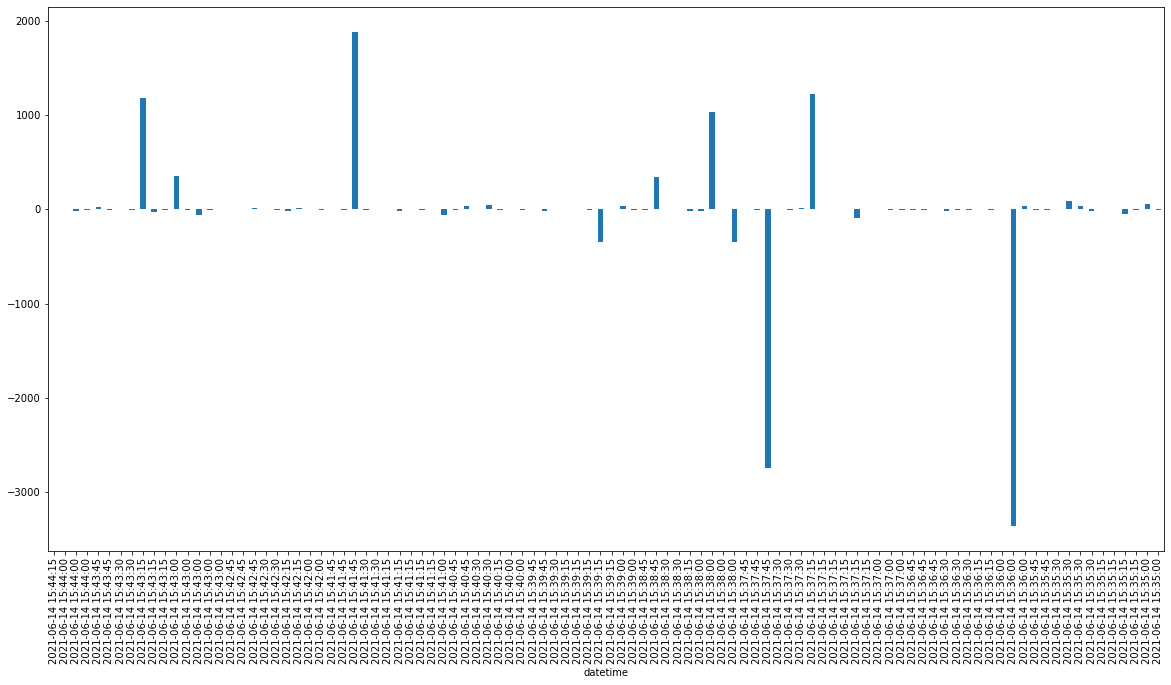

In [769]:
plotmdf.set_index("datetime")["c"][:100].plot.bar(figsize=(20, 10))

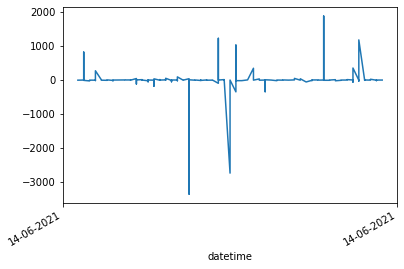

In [766]:
ax = plotmdf.set_index("datetime")["c"][:150].plot()
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

<AxesSubplot:xlabel='datetime'>

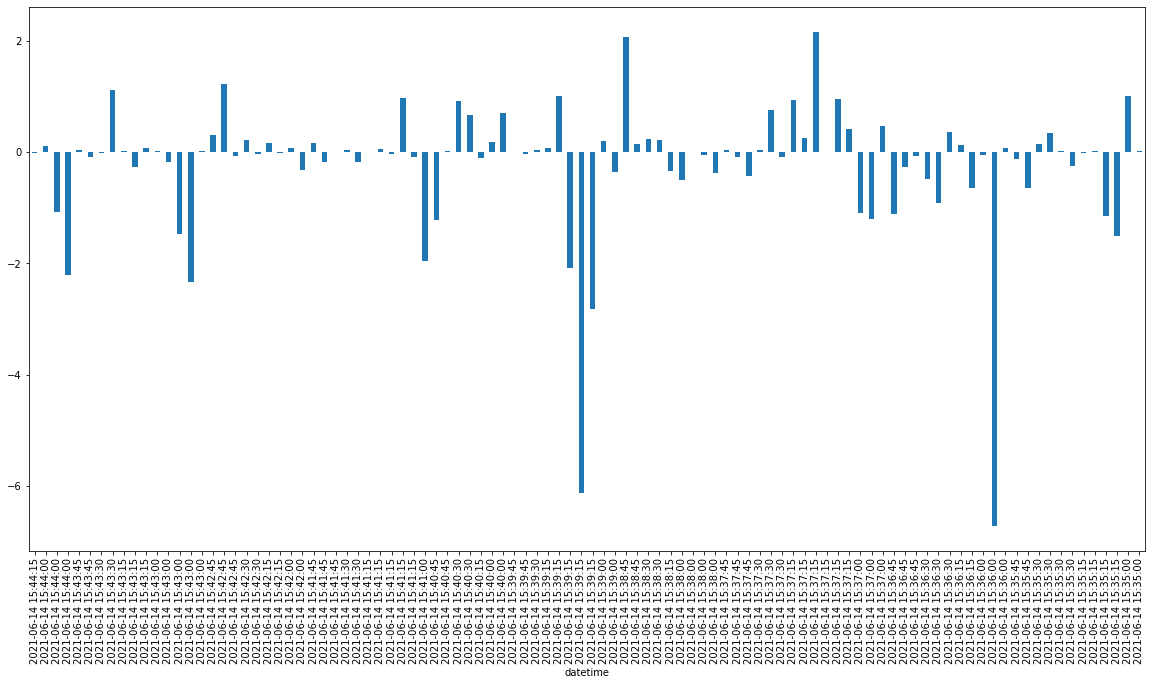

In [767]:
plotmdf.set_index("datetime")["delta"][:100].plot.bar(figsize=(20, 10))

In [768]:
mdf["delta"][:100].sort_values(ascending=False)

datetime             price
2021-06-14 14:23:00  40880     5.354622
2021-06-14 14:20:15  40960     3.764861
                     40940     3.675678
2021-06-14 14:23:00  40900     3.088872
2021-06-14 14:20:15  40970     3.070386
                                ...    
2021-06-14 14:21:00  40910    -2.500071
2021-06-14 14:23:00  40840    -2.687606
2021-06-14 14:21:30  40840    -4.509644
2021-06-14 14:19:15  40930   -10.840804
2021-06-14 14:19:30  40930   -12.265960
Name: delta, Length: 100, dtype: float64

In [659]:
snp

array([ 0.        ,  0.14017642,  0.1291646 , ...,  0.35255299,
        0.01579126, -1.        ])

            data
2015-07-01    63
2015-07-02    41
2015-07-03    15
2015-07-04    56
2015-07-05    26


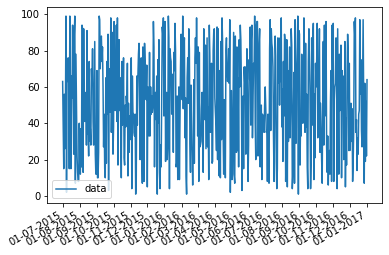

In [731]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates

# convert date objects from pandas format to python datetime
index = pd.date_range(start = "2015-07-01", end = "2017-01-01", freq = "D")
index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in index]
data = np.random.randint(1,100, size=len(index))
df = pd.DataFrame(data=data,index=index, columns=['data'])
print (df.head())

ax = df.plot()
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

plt.show()

In [733]:
mdates.DateLocator??

In [662]:
mdf.reset_index()

,datetime,price,sell,buy,delta,b,s,mask
0,2021-06-13 20:24:00,38780,0.000000,0.042181,0.042181,-1.000000,0.000000,0
1,2021-06-13 20:24:00,38770,0.140176,0.249837,0.109660,0.042181,0.140176,1
2,2021-06-13 20:24:00,38760,0.129165,0.097033,-0.032131,0.249837,0.129165,1
3,2021-06-13 20:24:00,38750,0.017529,0.258517,0.240988,0.097033,0.017529,1
4,2021-06-13 20:24:15,38780,0.000000,0.046195,0.046195,0.258517,0.000000,1
...,...,...,...,...,...,...,...,...
3315,2021-06-14 00:12:45,38830,0.174358,0.219110,0.044751,0.103446,0.174358,1
3316,2021-06-14 00:12:45,38820,0.333297,0.432832,0.099535,0.219110,0.333297,1
3317,2021-06-14 00:12:45,38810,0.352553,0.345411,-0.007142,0.432832,0.352553,1
3318,2021-06-14 00:13:00,38820,0.015791,0.052947,0.037156,0.345411,0.015791,1


In [663]:
mdf.head(-5)

sell       buy     delta         b         s  \
datetime            price                                                     
2021-06-13 20:24:00 38780  0.000000  0.042181  0.042181 -1.000000  0.000000   
                    38770  0.140176  0.249837  0.109660  0.042181  0.140176   
                    38760  0.129165  0.097033 -0.032131  0.249837  0.129165   
                    38750  0.017529  0.258517  0.240988  0.097033  0.017529   
2021-06-13 20:24:15 38780  0.000000  0.046195  0.046195  0.258517  0.000000   
...                             ...       ...       ...       ...       ...   
2021-06-14 00:12:15 38840  0.278485  0.584156  0.305671  0.324077  0.278485   
                    38830  0.009055  0.008480 -0.000575  0.584156  0.009055   
2021-06-14 00:12:30 38830  0.000000  0.008064  0.008064  0.008480  0.000000   
                    38820  0.255228  1.033760  0.778532  0.008064  0.255228   
                    38810  2.223773  0.103446 -2.120327  1.033760  2.223773   

                           mask  
datetime            price        
2021-06-13 20:24:00 38780     0  
                    38770     1  
                    38760     1  
                    38750     1  
2021-06-13 20:24:15 38780     1  
...                         ...  
2021-06-14 00:12:15 38840     1  
                    38830     1  
2021-06-14 00:12:30 38830     1  
                    38820     1  
                    38810     1  

[3315 rows x 6 columns]

In [664]:
mdf.head(5)

sell       buy     delta         b         s  \
datetime            price                                                     
2021-06-13 20:24:00 38780  0.000000  0.042181  0.042181 -1.000000  0.000000   
                    38770  0.140176  0.249837  0.109660  0.042181  0.140176   
                    38760  0.129165  0.097033 -0.032131  0.249837  0.129165   
                    38750  0.017529  0.258517  0.240988  0.097033  0.017529   
2021-06-13 20:24:15 38780  0.000000  0.046195  0.046195  0.258517  0.000000   

                           mask  
datetime            price        
2021-06-13 20:24:00 38780     0  
                    38770     1  
                    38760     1  
                    38750     1  
2021-06-13 20:24:15 38780     1

datetime             price
2021-06-13 22:40:15  38990    7.414631
2021-06-13 20:25:00  38740    3.941562
2021-06-13 20:48:00  38930    3.032108
2021-06-13 22:41:45  38970    2.826490
2021-06-13 22:15:00  38730    2.674531
                                ...   
2021-06-13 23:49:30  38870         NaN
2021-06-14 00:01:30  39140         NaN
2021-06-14 00:05:00  39000         NaN
2021-06-14 00:06:45  38920         NaN
2021-06-14 00:10:45  38880         NaN
Length: 3320, dtype: float64

,datetime,price,sell,buy,delta,b,s,mask,poc,c,c+
3167,2021-06-14 00:04:00,39080,3.666806,0.026096,-3.640710,0.000000,3.666806,1,0.000000,0.000000,0.000000
3168,2021-06-14 00:04:00,39070,3.227611,0.033762,-3.193849,0.026096,3.227611,1,0.051355,-124.682027,124.682027
3169,2021-06-14 00:04:00,39060,2.267359,0.000000,-2.267359,0.033762,2.267359,1,0.065543,-68.156542,68.156542
3170,2021-06-14 00:04:00,39050,0.802085,0.000000,-0.802085,0.000000,0.802085,1,0.000000,0.000000,0.000000
3171,2021-06-14 00:04:00,39040,0.546846,0.000000,-0.546846,0.000000,0.546846,1,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
9,2021-06-13 20:24:15,38730,0.479786,0.063058,-0.416728,0.349554,0.479786,1,0.109782,-2.372567,2.372567
0,2021-06-13 20:24:00,38780,0.000000,0.042181,0.042181,-1.000000,0.000000,0,0.000000,-0.000000,0.000000
1,2021-06-13 20:24:00,38770,0.140176,0.249837,0.109660,0.042181,0.140176,1,0.045334,-4.323246,4.323246
2,2021-06-13 20:24:00,38760,0.129165,0.097033,-0.032131,0.249837,0.129165,1,0.082251,2.934251,2.934251


In [691]:
result = mdf.reset_index().to_json(orient="records")

In [692]:
result

'[{"datetime":1623615840000,"price":38780,"sell":0.0,"buy":0.04218057,"delta":0.04218057,"b":-1.0,"s":0.0,"mask":0,"poc":0.0,"c":0.0,"c+":0.0},{"datetime":1623615840000,"price":38770,"sell":0.14017642,"buy":0.24983677,"delta":0.10966035,"b":0.04218057,"s":0.14017642,"mask":1,"poc":0.045334383,"c":-4.3232462245,"c+":4.3232462245},{"datetime":1623615840000,"price":38760,"sell":0.1291646,"buy":0.09703315,"delta":-0.03213145,"b":0.24983677,"s":0.1291646,"mask":1,"poc":0.0822507453,"c":2.9342511029,"c+":2.9342511029},{"datetime":1623615840000,"price":38750,"sell":0.01752947,"buy":0.25851703,"delta":0.24098756,"b":0.09703315,"s":0.01752947,"mask":1,"poc":0.0243300541,"c":6.5354297648,"c+":6.5354297648},{"datetime":1623615855000,"price":38780,"sell":0.0,"buy":0.04619461,"delta":0.04619461,"b":0.25851703,"s":0.0,"mask":1,"poc":0.0,"c":0.0,"c+":0.0},{"datetime":1623615855000,"price":38770,"sell":0.0239,"buy":0.0,"delta":-0.0239,"b":0.04619461,"s":0.0239,"mask":1,"poc":0.0152034851,"c":2.9328288

<AxesSubplot:xlabel='datetime'>

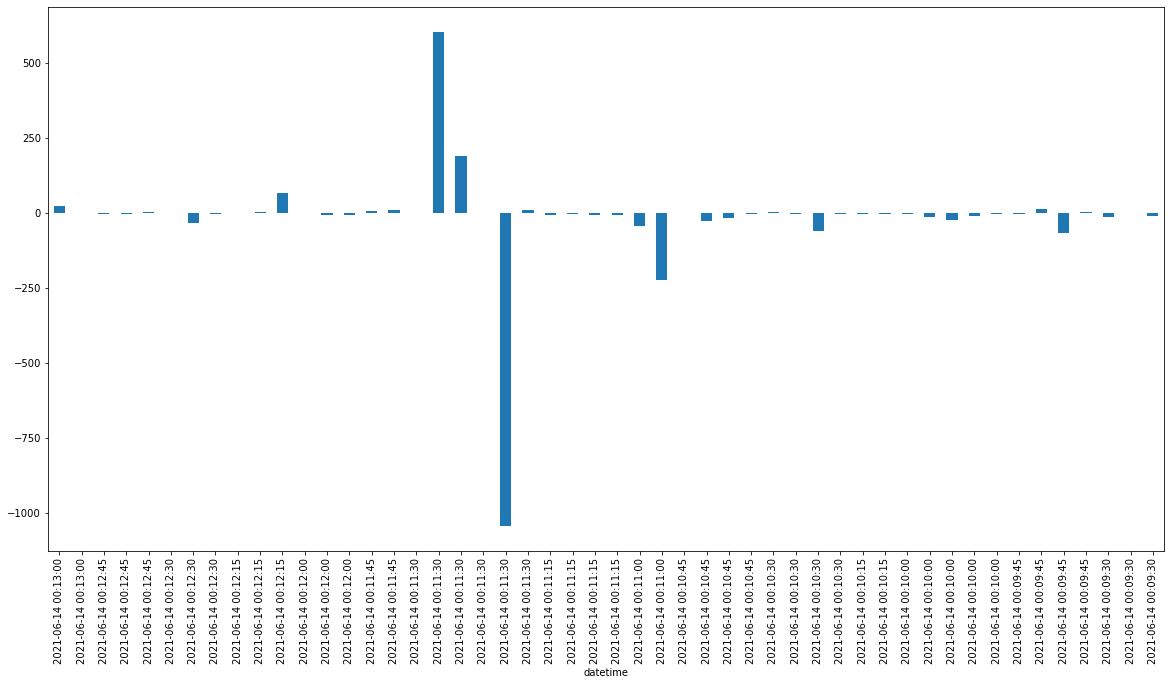

<AxesSubplot:xlabel='datetime'>

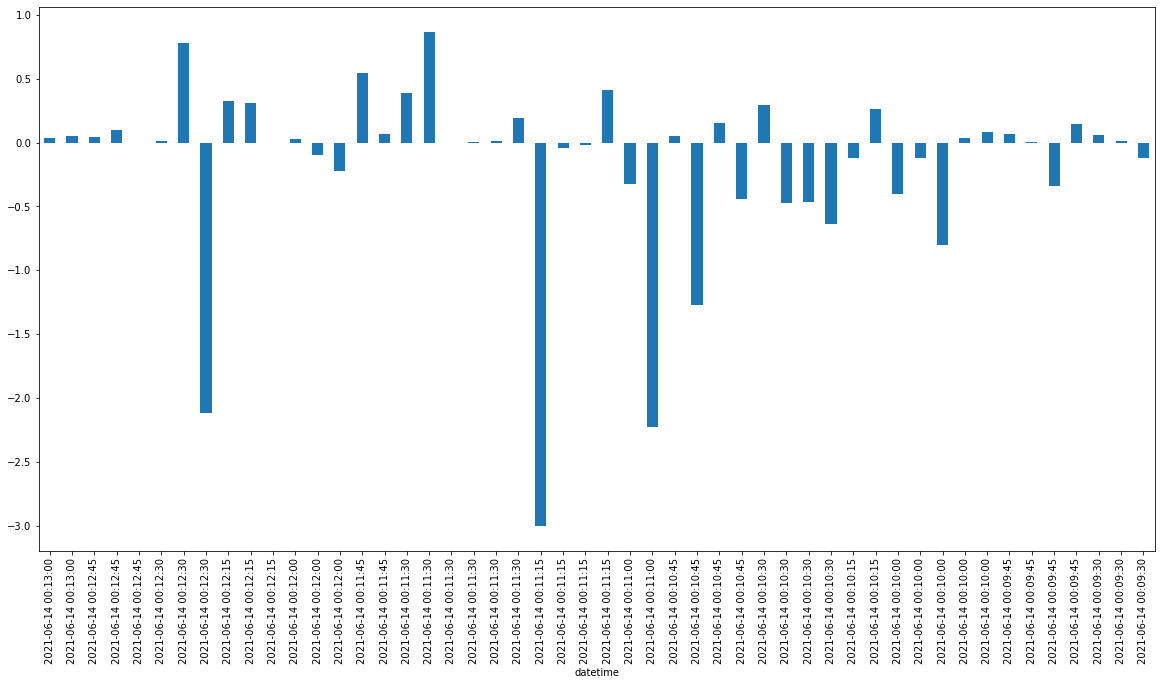

datetime             price
2021-06-14 14:59:00  40500    -14179.800682
2021-06-14 01:41:00  39710    -12935.276500
2021-06-14 02:23:45  38980    -12014.445987
2021-06-14 14:58:00  40630    -11866.712853
2021-06-14 00:53:30  39150     -7654.156174
                                  ...      
2021-06-14 02:38:30  38960      6439.867242
2021-06-14 01:15:00  39040     11432.134196
2021-06-14 01:32:45  39680     13723.104564
2021-06-14 01:12:45  39020     16463.877505
2021-06-14 04:24:30  39200    187914.793103
Name: c, Length: 4850, dtype: float64

In [694]:
mdf.loc[:][:250]

sell       buy     delta         b         s  \
datetime            price                                                     
2021-06-13 20:24:00 38780  0.000000  0.042181  0.042181 -1.000000  0.000000   
                    38770  0.140176  0.249837  0.109660  0.042181  0.140176   
                    38760  0.129165  0.097033 -0.032131  0.249837  0.129165   
                    38750  0.017529  0.258517  0.240988  0.097033  0.017529   
2021-06-13 20:24:15 38780  0.000000  0.046195  0.046195  0.258517  0.000000   
...                             ...       ...       ...       ...       ...   
2021-06-13 20:39:45 38870  0.855719  1.208407  0.352689  1.369375  0.855719   
                    38860  0.146003  1.386003  1.240000  1.208407  0.146003   
                    38850  0.002737  1.200931  1.198194  1.386003  0.002737   
2021-06-13 20:40:00 38860  0.469066  0.381319 -0.087748  1.200931  0.469066   
                    38850  0.137317  0.159837  0.022520  0.381319  0.137317   

                           mask       poc           c          c+  
datetime            price                                          
2021-06-13 20:24:00 38780     0  0.000000   -0.000000    0.000000  
                    38770     1  0.045334   -4.323246    4.323246  
                    38760     1  0.082251    2.934251    2.934251  
                    38750     1  0.024330    6.535430    6.535430  
2021-06-13 20:24:15 38780     1  0.000000    0.000000    0.000000  
...                         ...       ...         ...         ...  
2021-06-13 20:39:45 38870     1  0.395080    2.600263    2.600263  
                    38860     1  0.229050    9.276608    9.276608  
                    38850     1  0.005453  507.317091  507.317091  
2021-06-13 20:40:00 38860     1  0.411130    3.560259    3.560259  
                    38850     1  0.129207    3.776919    3.776919  

[250 rows x 9 columns]

In [582]:
mdf.reset_index()[["price", "s", "b"]].apply(lambda x: print(x[0], x[1], x[2]))

36000 35990 35980
0.0 0.06516712 0.07842619
-1.0 0.0014378899999999998 0.08310131


price    None
s        None
b        None
dtype: object

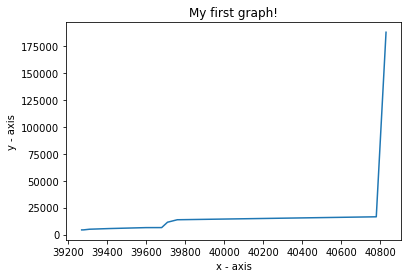

datetime    price
2021-06-14  39080    1.000000
            39070    1.000000
            39060    1.280345
            39050   -1.093199
            39040    1.316776
dtype: float64

In [685]:
(((mdf["s"]) + (mdf["b"]) / (mdf["s"] * -1) + (mdf["b"])) * mdf["mask"])[:15]

datetime             price
2021-06-13 20:24:00  38780          NaN
                     38770    -0.118554
                     38760    -1.555250
                     38750    -5.420867
2021-06-13 20:24:15  38780         -inf
                     38770    -1.862734
                     38760     0.240000
                     38750     1.403299
                     38740     0.483015
                     38730     0.100778
2021-06-13 20:24:30  38750         -inf
                     38740     1.545255
                     38730   -19.073634
2021-06-13 20:24:45  38750         -inf
                     38740    -1.736607
dtype: float64

In [686]:
((((mdf["s"] * -1) + (mdf["b"])) / ((mdf["s"]) + (mdf["b"]))) * mdf["mask"]) 

datetime             price
2021-06-13 20:24:00  38780    0.000000
                     38770   -0.537385
                     38760    0.318395
                     38750    0.693976
2021-06-13 20:24:15  38780    1.000000
                                ...   
2021-06-14 00:12:45  38830   -0.255258
                     38820   -0.206709
                     38810    0.102216
2021-06-14 00:13:00  38820    0.912563
                     38810   -0.000000
Length: 3320, dtype: float64

In [687]:
df2a = df2[(df2['datetime'] >= '2021-06-12 18:00:20') & (df2['datetime'] <= '2021-06-12 18:30')]
df3 = pd.DataFrame(df2a.groupby(["datetime", "price", "side"])["size"].sum())

df4 = df3.sort_values(by = ['datetime','price'], ascending=[True, False])
df4

,,,size
datetime,price,side,


In [688]:
def do(row):
    print(row.name)
    
df4.apply(lambda row: do(row), axis = 1)

None


Series([], dtype: float64)

In [689]:
df4.groupby(['datetime']).count()

,size
datetime,


In [518]:
df4[:50]

,,,size
datetime,price,side,
